<a href="https://colab.research.google.com/github/maggie8801/EDA/blob/main/LTV_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 12/28課程

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x:'%.2f'% x)

### Import Data

In [81]:
customer_value = pd.read_csv('/content/drive/MyDrive/Jourdeness/customer_segmentation_result.csv', index_col=False)
customer_value.head()

,Unnamed: 0,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,0,9100002488768.00,123,3,23,2,268088.00,2,7,High-Value
1,1,9100002508831.00,16,3,25,2,276824.00,2,7,High-Value
2,2,9100001761848.00,61,3,20,2,197248.00,2,7,High-Value
3,3,9100002480946.00,25,3,27,2,336376.00,2,7,High-Value
4,4,9100002184202.00,18,3,20,2,235864.00,2,7,High-Value


In [82]:
customer_value = customer_value.drop('Unnamed: 0', axis=1)
customer_value

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,9100002488768.00,123,3,23,2,268088.00,2,7,High-Value
1,9100002508831.00,16,3,25,2,276824.00,2,7,High-Value
2,9100001761848.00,61,3,20,2,197248.00,2,7,High-Value
3,9100002480946.00,25,3,27,2,336376.00,2,7,High-Value
4,9100002184202.00,18,3,20,2,235864.00,2,7,High-Value
...,...,...,...,...,...,...,...,...,...
71200,9100001413693.00,314,2,15,1,411904.00,3,6,High-Value
71201,9100002425503.00,305,2,15,1,383232.00,3,6,High-Value
71202,9100001137315.00,671,0,14,1,361280.00,3,4,Mid-Value
71203,9100001031231.00,347,1,14,1,391392.00,3,5,High-Value


In [83]:
customer_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71205 entries, 0 to 71204
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        71205 non-null  float64
 1   Recency           71205 non-null  int64  
 2   RecencyCluster    71205 non-null  int64  
 3   Frequency         71205 non-null  int64  
 4   FrequencyCluster  71205 non-null  int64  
 5   Revenue           71205 non-null  float64
 6   RevenueCluster    71205 non-null  int64  
 7   OverallScore      71205 non-null  int64  
 8   Segment           71205 non-null  object 
dtypes: float64(2), int64(6), object(1)
memory usage: 4.9+ MB


### Label encoding
#### 最常見的資料轉換法是label encoding和one hot encoding

In [84]:
#把類別型資料轉換成數字
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
customer_value['Segment'] = labelencoder.fit_transform(customer_value['Segment'])
customer_value.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,9100002488768.00,123,3,23,2,268088.00,2,7,0
1,9100002508831.00,16,3,25,2,276824.00,2,7,0
2,9100001761848.00,61,3,20,2,197248.00,2,7,0
3,9100002480946.00,25,3,27,2,336376.00,2,7,0
4,9100002184202.00,18,3,20,2,235864.00,2,7,0


In [92]:
labelencoder.classes_

array(['High-Value', 'Low-Value', 'Mid-Value'], dtype=object)

### Calculate and Show correlations

In [94]:
#看兩個變數之間的差異程度，愈相似愈靠近1。有正相關和負相關，-1~1
corr_matrix = customer_value.corr()
corr_matrix
#相關係數對角線都會是1
#feature量不夠多，所以才會出現很多1，因為很多資料根本沒什麼差異

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
CustomerID,1.00,0.13,-0.13,-0.29,-0.28,-0.30,-0.29,-0.27,0.16
Recency,0.13,1.00,-0.97,-0.47,-0.47,-0.44,-0.45,-0.77,0.15
RecencyCluster,-0.13,-0.97,1.00,0.47,0.47,0.44,0.44,0.78,-0.15
Frequency,-0.29,-0.47,0.47,1.00,0.97,0.93,0.91,0.89,-0.59
FrequencyCluster,-0.28,-0.47,0.47,0.97,1.00,0.90,0.90,0.90,-0.60
Revenue,-0.30,-0.44,0.44,0.93,0.90,1.00,0.95,0.87,-0.57
RevenueCluster,-0.29,-0.45,0.44,0.91,0.90,0.95,1.00,0.89,-0.59
OverallScore,-0.27,-0.77,0.78,0.89,0.90,0.87,0.89,1.00,-0.50
Segment,0.16,0.15,-0.15,-0.59,-0.60,-0.57,-0.59,-0.50,1.00


In [95]:
corr_matrix['Segment'].sort_values(ascending=False)
print(corr_matrix['Segment'].sort_values(ascending=False))

Segment             1.00
CustomerID          0.16
Recency             0.15
RecencyCluster     -0.15
OverallScore       -0.50
Revenue            -0.57
Frequency          -0.59
RevenueCluster     -0.59
FrequencyCluster   -0.60
Name: Segment, dtype: float64


### Standardization

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#x是feature
x = scaler.fit_transform(customer_value[['Recency','RecencyCluster','Frequency','FrequencyCluster','Revenue','RevenueCluster','OverallScore']])
#y是結果
y = customer_value['Segment']
#透過x去預測y

In [97]:
x, y

(array([[-0.73342026,  1.09387593,  1.44730373, ...,  1.48475403,
          1.60006003,  1.56855306],
        [-1.23016427,  1.09387593,  1.64879703, ...,  1.55725989,
          1.60006003,  1.56855306],
        [-1.02125323,  1.09387593,  1.14506377, ...,  0.89680581,
          1.60006003,  1.56855306],
        ...,
        [ 1.81065185, -1.58571429,  0.54058386, ...,  2.25821635,
          2.74002116,  0.37735388],
        [ 0.30649243, -0.69251755,  0.54058386, ...,  2.50813584,
          2.74002116,  0.77442027],
        [ 0.45505138, -0.69251755,  0.64133051, ...,  2.50501516,
          2.74002116,  0.77442027]]), 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 71200    0
 71201    0
 71202    2
 71203    0
 71204    0
 Name: Segment, Length: 71205, dtype: int64)

### Split Test and Train sets

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=56)

In [99]:
x_train, y_train

(array([[-0.44558728,  0.20067919,  0.13759725, ..., -0.10652402,
          0.46009891,  0.37735388],
        [-1.2255218 ,  1.09387593, -0.56762932, ..., -0.60244556,
         -0.67986222, -0.01971252],
        [-0.9980409 ,  1.09387593, -0.76912262, ..., -0.69653055,
         -0.67986222, -0.01971252],
        ...,
        [-0.45487222,  0.20067919, -0.16464271, ..., -0.24522801,
         -0.67986222, -0.01971252],
        [-1.09089025,  1.09387593,  1.85029033, ...,  1.86428108,
          1.60006003,  1.56855306],
        [-1.15124232,  1.09387593, -0.46688267, ..., -0.34495677,
         -0.67986222, -0.01971252]]), 19289    2
 33942    2
 31778    2
 64818    1
 47781    1
         ..
 65769    1
 42106    1
 25835    2
 3264     0
 33167    2
 Name: Segment, Length: 35602, dtype: int64)

### Support Vector Machine

In [100]:
#參數
#1. 核函數 kernel - 在模型裡面，我們可以選擇各式各樣的核函數，包含線性、多項式、高斯、sigmoid等等
#2. 參數C - C為懲罰係數。 C愈大代表錯誤的容忍程度愈低，在訓練集樣本中會區分的愈精細，因此設定太大容易造成過度擬和的問題。反之，設定太小則會造成低度擬合的問題。若沒設定，模型中預設為1。
#3. 參數gamma - gamma參數決定支援向量的多寡，並影響訓練速度與預測速度 。此參數有兩個自動運算選擇，分別為’scale’與’auto’，或是也可以直接指定數值，設定後會以下列方式算出隱含參數，以決定資料映射到新特徵空間後的分佈，在未設定下預設為’scale’。
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score

clf = svm.SVC(kernel='rbf', C=1, gamma='auto') #rbf高斯 #1預設值
clf.fit(x_train, y_train)

clf.predict(x_test)

array([1, 1, 2, ..., 1, 2, 0])

In [101]:
print(clf.score(x_train, y_train)) #這個分數很靠近1是正常的
print(clf.score(x_test, y_test)) #這個是1不行喔，表示overfitting了

#交叉驗證
#scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
#print(scores)
#print(scores.mean())

#overfitting是過度擬合
#underfitting是低度擬合

1.0
1.0


### Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, train_test_split #交叉驗證用

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

print(logreg.score(x_train, y_train))
print(logreg.score(x_test, y_test))

#交叉驗證
#scores = cross_val_score(logreg, x_train, y_train, cv=5, scoring='accuracy')
#print(scores)
#print(scores.mean())

1.0
1.0


### Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9761530251109488
0.9739066932561863


### K-Nearest Neighbors

In [104]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))

0.999887646761418
0.9998876499171419


### Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier

#criterion使用entropy來計算訊息增益
#max_depth是指樹狀圖的最大深度
model = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

1.0
1.0


[Text(133.92000000000002, 181.2, 'X[6] <= -0.218\nentropy = 1.501\nsamples = 35602\nvalue = [9893, 17633, 8076]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 17633\nvalue = [0, 17633, 0]'),
 Text(200.88000000000002, 108.72, 'X[6] <= 0.576\nentropy = 0.993\nsamples = 17969\nvalue = [9893, 0, 8076]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 8076\nvalue = [0, 0, 8076]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.0\nsamples = 9893\nvalue = [9893, 0, 0]')]

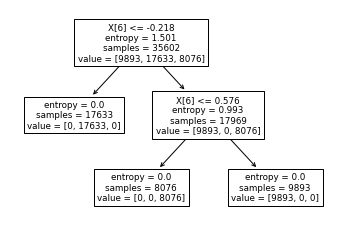

In [106]:
from sklearn.tree import export_graphviz
from sklearn import tree
#viz code
tree.plot_tree(model)
#用圖來看樹的運作模式

### xgboost

In [107]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(x_train, y_train)

print(xgbc.score(x_train, y_train))
print(xgbc.score(x_test, y_test))

1.0
1.0
